In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error


In [2]:
import os
os.chdir(r"D:\AI\Depi")

In [3]:
df=pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: xlabel='area'>

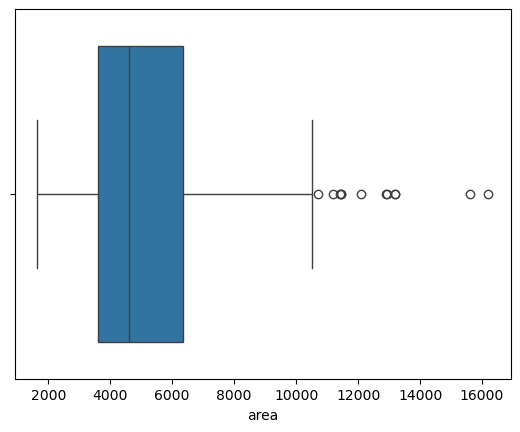

In [5]:
sns.boxplot(x='area', data=df)

<Axes: xlabel='area', ylabel='price'>

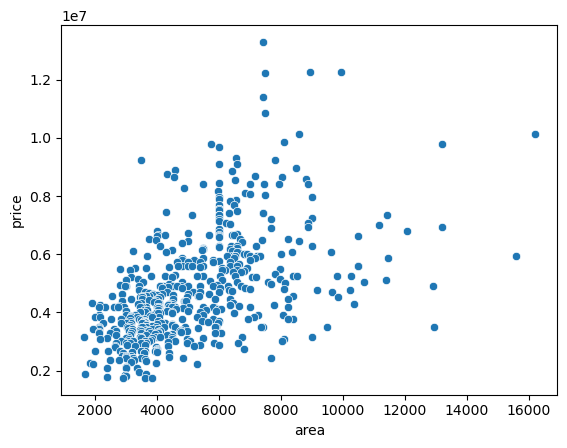

In [6]:
sns.scatterplot(x='area', y='price', data=df)

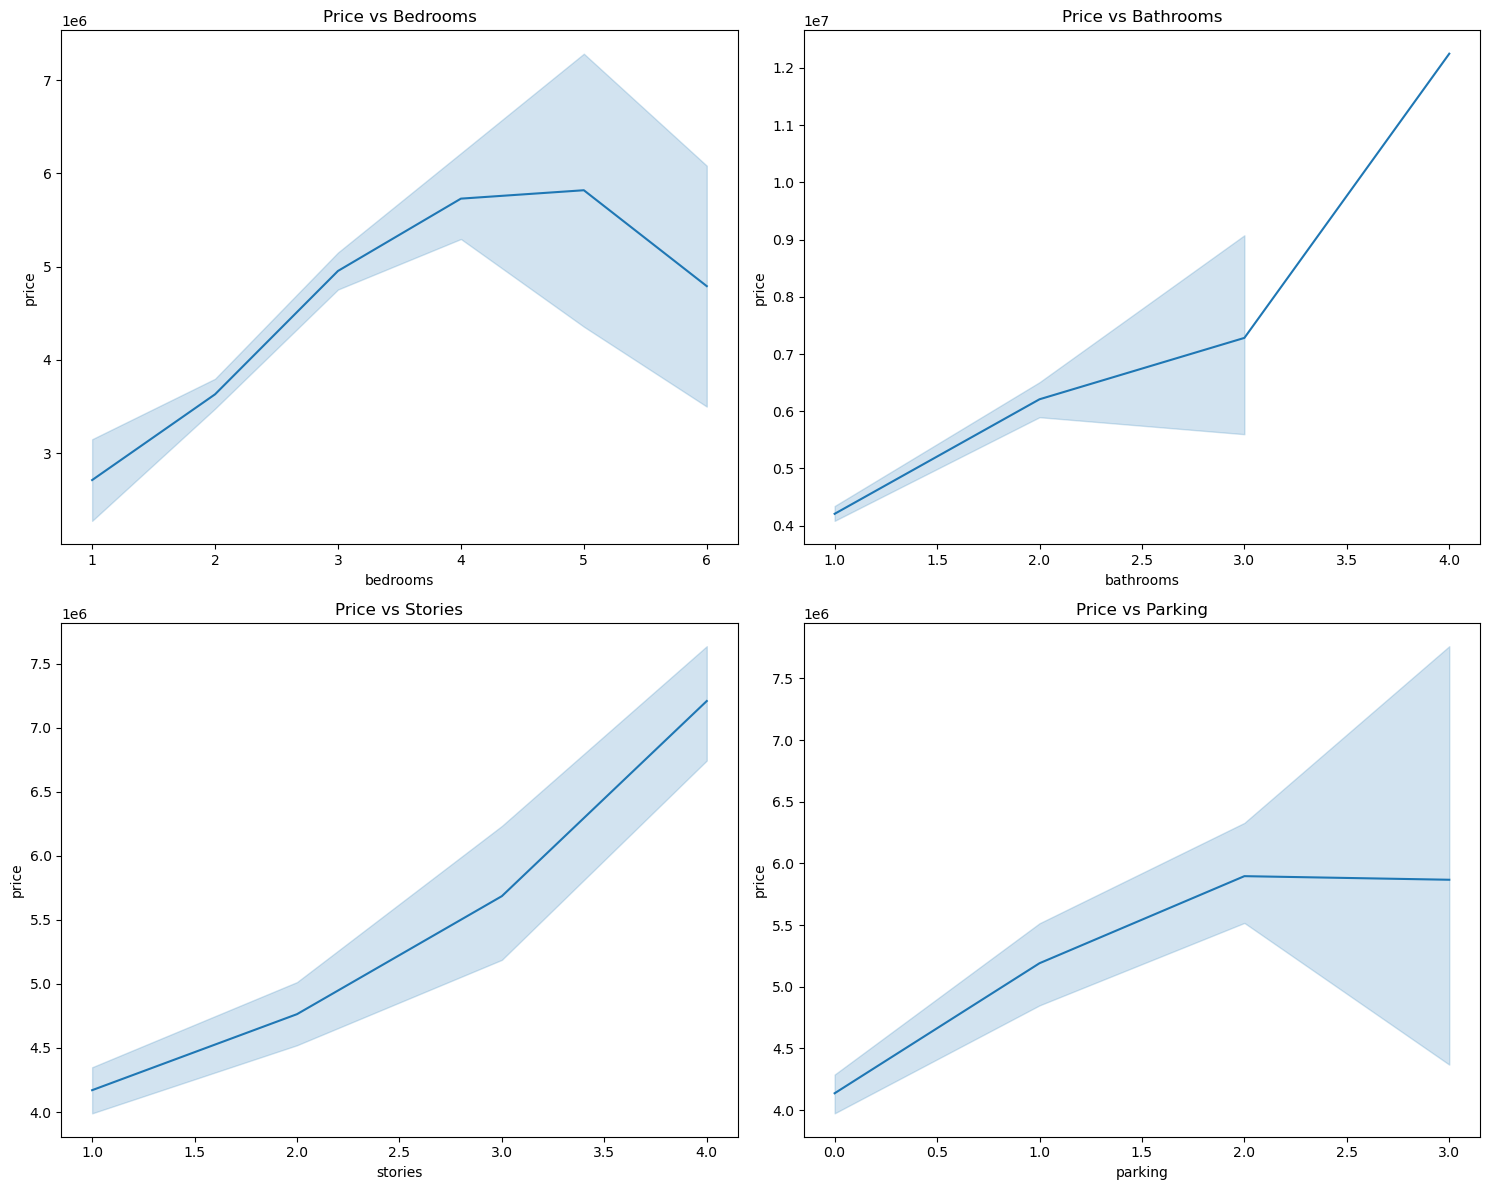

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot for bedrooms
sns.lineplot(x='bedrooms', y='price', data=df, ax=axes[0,0])
axes[0,0].set_title('Price vs Bedrooms')

# Plot for bathrooms
sns.lineplot(x='bathrooms', y='price', data=df, ax=axes[0,1])
axes[0,1].set_title('Price vs Bathrooms')

# Plot for stories
sns.lineplot(x='stories', y='price', data=df, ax=axes[1,0])
axes[1,0].set_title('Price vs Stories')

# Plot for parking
sns.lineplot(x='parking', y='price', data=df, ax=axes[1,1])
axes[1,1].set_title('Price vs Parking')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [8]:
# remove outliers
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]



In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

    furnishingstatus  
15                 1  
16                 2  
17                 0  
18                 0  
19                 1  


<Axes: >

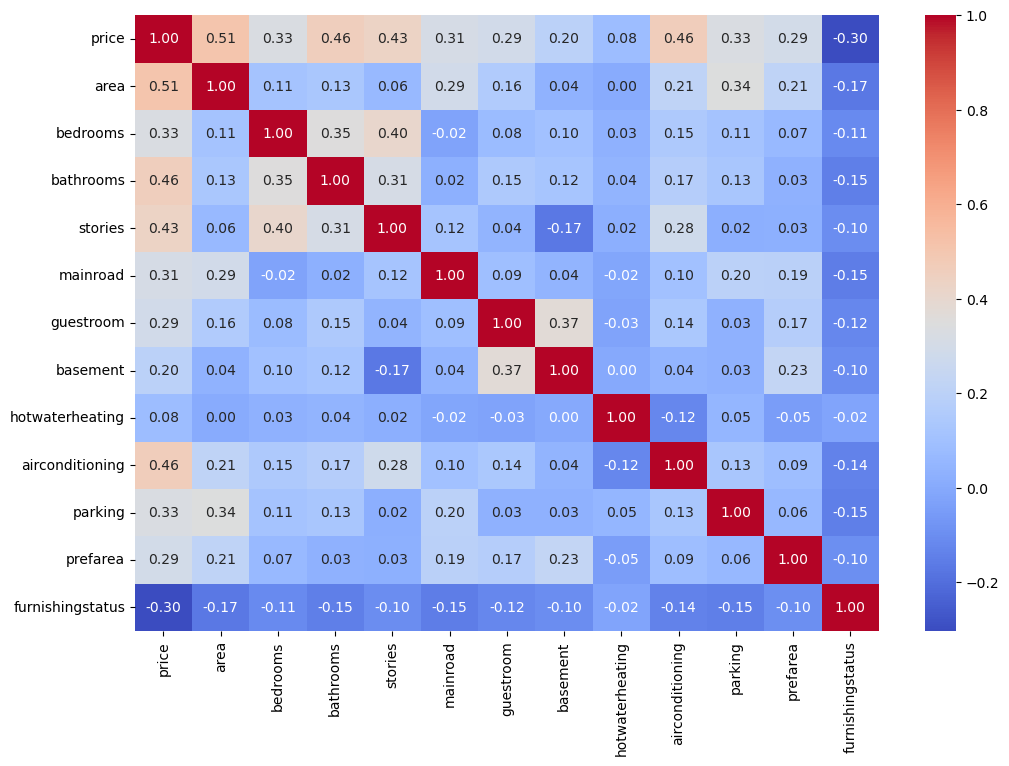

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

In [11]:

x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
model= LinearRegression()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print("Training Set Evaluation:")
print("Mean Squared Error:", root_mean_squared_error(y_train, y_pred_train))
print("R^2 Score:", r2_score(y_train, y_pred_train))
print("\nTesting Set Evaluation:")
print("Mean Squared Error:", root_mean_squared_error(y_test, y_pred_test))
print("R^2 Score:", r2_score(y_test, y_pred_test))


Training Set Evaluation:
Mean Squared Error: 888111.2962513495
R^2 Score: 0.6581558484033723

Testing Set Evaluation:
Mean Squared Error: 1083567.9219957418
R^2 Score: 0.6609158761625454


In [15]:
from sklearn.preprocessing import PolynomialFeatures
model2 = PolynomialFeatures(degree=2)
x_poly_train = model2.fit_transform(x_train)
x_poly_test = model2.transform(x_test) 

lin2 = LinearRegression()
lin2.fit(x_poly_train, y_train)
y_poly_pred_train = lin2.predict(x_poly_train)
y_poly_pred_test = lin2.predict(x_poly_test)

print("Polynomial Regression Training Set Evaluation:")
print("Mean Squared Error:", root_mean_squared_error(y_train, y_poly_pred_train))
print("R^2 Score:", r2_score(y_train, y_poly_pred_train))
print("\nPolynomial Regression Testing Set Evaluation:")
print("Mean Squared Error:", root_mean_squared_error(y_test, y_poly_pred_test))
print("R^2 Score:", r2_score(y_test, y_poly_pred_test))

Polynomial Regression Training Set Evaluation:
Mean Squared Error: 719081.4485236874
R^2 Score: 0.7758960376583195

Polynomial Regression Testing Set Evaluation:
Mean Squared Error: 1177024.3634551896
R^2 Score: 0.5999022750449272
